# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Assignment 3

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import astroML
from astroML.stats import sigmaG
import pandas as pd

# Q1

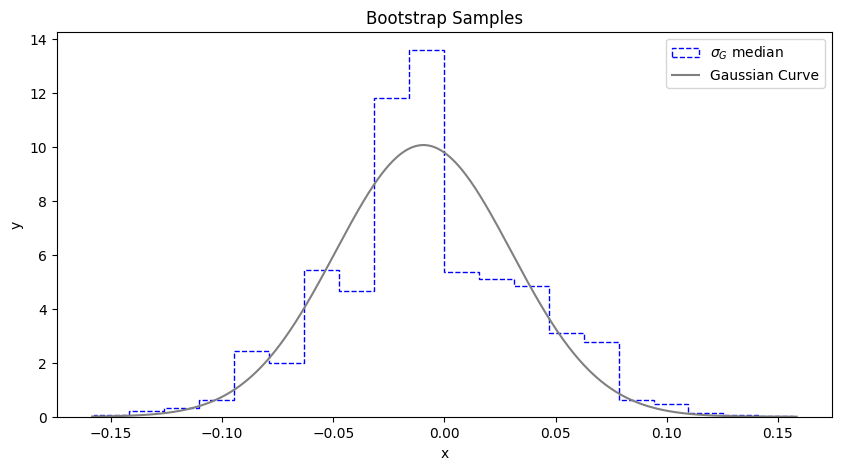

In [26]:
from astroML.resample import bootstrap
from astroML.plotting import hist
from astroML.stats import median_sigmaG

num_samples = 1000
num_bootsrap = 10000

# Generate a random sample from a normal distribution
sampled_data = np.random.normal(0, 1, num_samples)

# Bootstrap samples from the data
mu_bootstrap, _ = bootstrap(sampled_data, num_bootsrap, median_sigmaG, dict(axis=1))

sigma = np.sqrt(np.pi / (2 * num_samples))

x = np.linspace(-4 * sigma, 4 * sigma, 1000)

# Gaussian curve from the bootstrap samples
pdf = stats.norm.pdf(x, loc=np.mean(mu_bootstrap), scale=sigma)


# Plot the histogram of the bootstrap samples and the Gaussian curve
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(mu_bootstrap, bins=20, density=True, histtype='step',
        color='blue', ls='dashed', label=r'$\sigma_G$ median')
ax.plot(x, pdf, color='gray', label='Gaussian Curve')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.title.set_text('Bootstrap Samples')
ax.legend()

plt.show()

# Q2

     x    y  sigma_y
0  203  495       21
1   58  173       15
2  210  479       27
3  202  504       14
4  198  510       30
Best Fit Parameters using curve_fit: m = 2.2399208553933314, c = 34.047723577096654
Best Fit Parameters using method from paper: m = 2.2399208316310975, c = 34.04772775754255


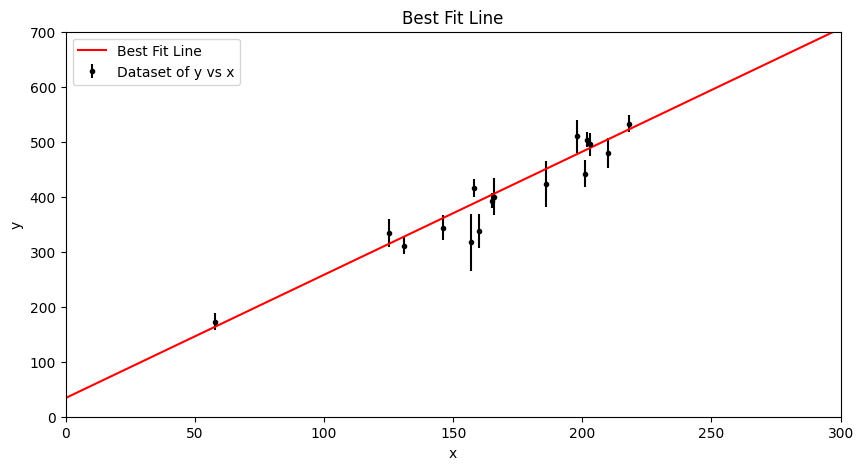

In [27]:
# Read the data from the csv file
df = pd.read_csv('q2.csv', sep=' ')
df.drop('id', axis=1, inplace=True)
df.drop('sigma_x', axis=1, inplace=True)
# df.drop('sigma_y', axis=1, inplace=True)
df.drop('rho', axis=1, inplace=True)
print(df.head())

# Define the function to fit the data
def curve_func(m, x, c):
    return m * x + c

# Fit the data using curve_fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(curve_func, df['x'], df['y'], sigma=df['sigma_y'])
m = popt[0]
c = popt[1]

print("Best Fit Parameters using curve_fit: m = {}, c = {}".format(m, c))

# Fit the data using method in paper
Y = df['y'].to_numpy()
X = df['x'].to_numpy()
X = np.concatenate((np.ones((len(X), 1)), X.reshape(-1, 1)), axis=1)
C = np.diag(df['sigma_y'].to_numpy() ** 2)
best_fit_val = np.linalg.inv(X.T @ np.linalg.inv(C) @ X) @ (X.T @ np.linalg.inv(C) @ Y)

print("Best Fit Parameters using method from paper: m = {}, c = {}".format(best_fit_val[1], best_fit_val[0]))


# Plot the Data points and the best fit line
x = np.linspace(0, 300, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(df['x'], df['y'], yerr=df['sigma_y'], fmt='.k', ecolor='black', label='Dataset of y vs x')
ax.plot(x, curve_func(m, x, c), color='red', label='Best Fit Line')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0, 300)
ax.set_ylim(0, 700)
# ax.grid()
ax.legend()
ax.title.set_text('Best Fit Line')

plt.show()

# Q3

In [28]:
# N and M are used to calculate the degrees of freedom for the chi-square distribution.
N = 50
# M = 1
degrees_of_freedom = N - 1

# chi_square_values is an array of chi-square values to be used in the calculations
chi_square_values = np.array([0.96, 0.24, 3.84, 2.85])

# chi_square is the array of chi-square values multiplied by the degrees of freedom
chi_square = chi_square_values * degrees_of_freedom

# finding p values for each chi square value using chi2.cdf
p_values = [1 - stats.chi2.cdf(chi_square[i], degrees_of_freedom) for i in range(len(chi_square))]
print("p-value calculated using chi2.cdf: ")

for i in range(len(chi_square)):
    print("p value for chi square value of {}: {} for Plot {}".format(chi_square_values[i], p_values[i], i + 1))
    
print("\n")

# finding p values for each chi square value using chi2.sf
p_values = [stats.chi2.sf(chi_square[i], degrees_of_freedom) for i in range(len(chi_square))]
print("p-value calculated using chi2.sf: ")

for i in range(len(chi_square)):
    print("p value for chi square value of {}: {} for Plot {}".format(chi_square_values[i], p_values[i], i + 1))

p-value calculated using chi2.cdf: 
p value for chi square value of 0.96: 0.5529264339960218 for Plot 1
p value for chi square value of 0.24: 0.9999999917009567 for Plot 2
p value for chi square value of 3.84: 0.0 for Plot 3
p value for chi square value of 2.85: 1.2107292945984227e-10 for Plot 4


p-value calculated using chi2.sf: 
p value for chi square value of 0.96: 0.5529264339960217 for Plot 1
p value for chi square value of 0.24: 0.9999999917009567 for Plot 2
p value for chi square value of 3.84: 3.477504685373815e-18 for Plot 3
p value for chi square value of 2.85: 1.2107295923765585e-10 for Plot 4
